In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
df= pd.read_excel('/content/Homestays_Data.xlsx')

In [ ]:
import datetime

In [ ]:
df.head(6)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
5,12422935,4.442651,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,...,37.753164,-122.429526,Comfort Suite San Francisco,Noe Valley,3,100.0,https://a0.muscache.com/im/pictures/82509143-4...,94131,1.0,1.0


# Handling Missing Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      74111 non-null  int64         
 1   log_price               74111 non-null  float64       
 2   property_type           74111 non-null  object        
 3   room_type               74111 non-null  object        
 4   amenities               74111 non-null  object        
 5   accommodates            74111 non-null  int64         
 6   bathrooms               73911 non-null  float64       
 7   bed_type                74111 non-null  object        
 8   cancellation_policy     74111 non-null  object        
 9   cleaning_fee            74111 non-null  bool          
 10  city                    74111 non-null  object        
 11  description             74105 non-null  object        
 12  first_review            58247 non-null  dateti

In [ ]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   6
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                         10
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

As we can see that there are missing values in some of the features. So first we fill the missing values by appropriate methods.

In [ ]:
df.describe()

,id,log_price,accommodates,bathrooms,first_review,host_response_rate,host_since,last_review,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,58247,55812.000000,73923,58284,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,2016-01-14 08:11:51.013442560,0.943520,2014-07-21 01:55:09.849437696,2017-03-14 19:27:18.789376,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
min,3.440000e+02,0.000000,1.000000,0.000000,2008-11-17 00:00:00,0.000000,2008-03-03 00:00:00,2009-01-21 00:00:00,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,2015-06-28 00:00:00,1.000000,2013-04-21 00:00:00,2017-01-09 00:00:00,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,2016-05-25 00:00:00,1.000000,2014-09-28 00:00:00,2017-04-28 00:00:00,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,2017-01-02 00:00:00,1.000000,2015-12-22 00:00:00,2017-09-08 00:00:00,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,2017-10-05 00:00:00,1.000000,2017-10-04 00:00:00,2017-10-05 00:00:00,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000
std,6.081735e+06,0.717394,2.153589,0.582044,NaN,0.163418,NaN,NaN,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142


#### First we fill all the missing values in numerical type features with appropriate values. Than we fill the missing values in catagorical columns using appropriate methods.

# 1. Bathrooms


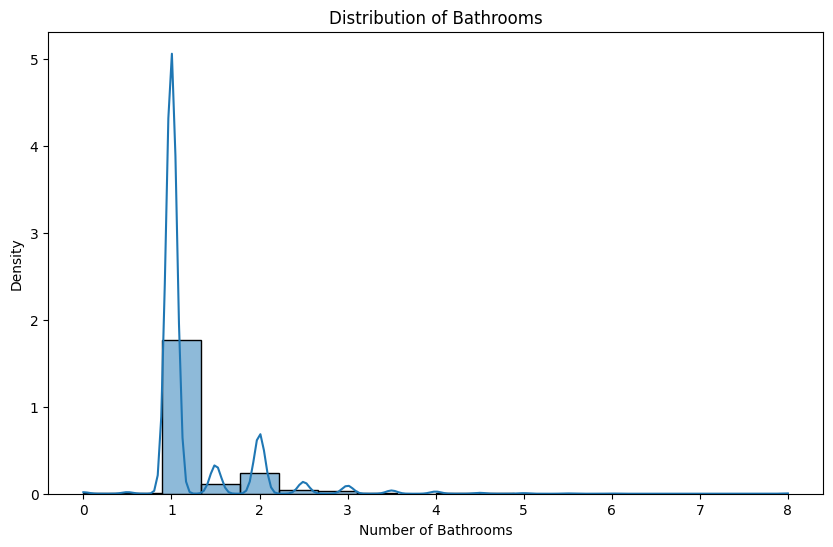

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['bathrooms'], kde=True, stat='density')
plt.title('Distribution of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Density')
plt.show()

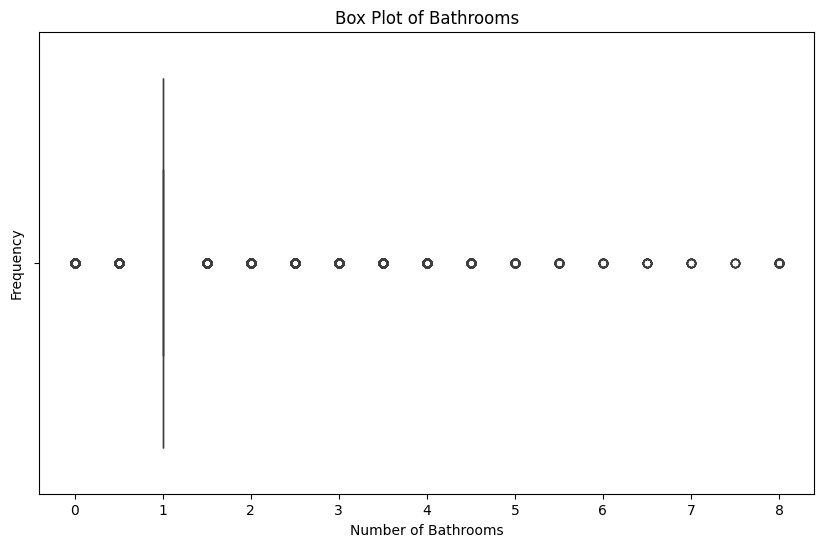

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bathrooms', data=df)
plt.title('Box Plot of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')
plt.show()

We can see here that 'bathroom' feature data is skewed. so for skewed data 'median' is the best value for missing values.

In [ ]:
median_bathroom=df['bedrooms'].median()

In [ ]:
df['bathrooms'].fillna(median_bathroom, inplace = True)

# 2. Host response rate

In [ ]:
df['host_response_rate']

0        NaN
1        1.0
2        1.0
3        NaN
4        1.0
        ... 
74106    NaN
74107    1.0
74108    1.0
74109    1.0
74110    1.0
Name: host_response_rate, Length: 74111, dtype: float64

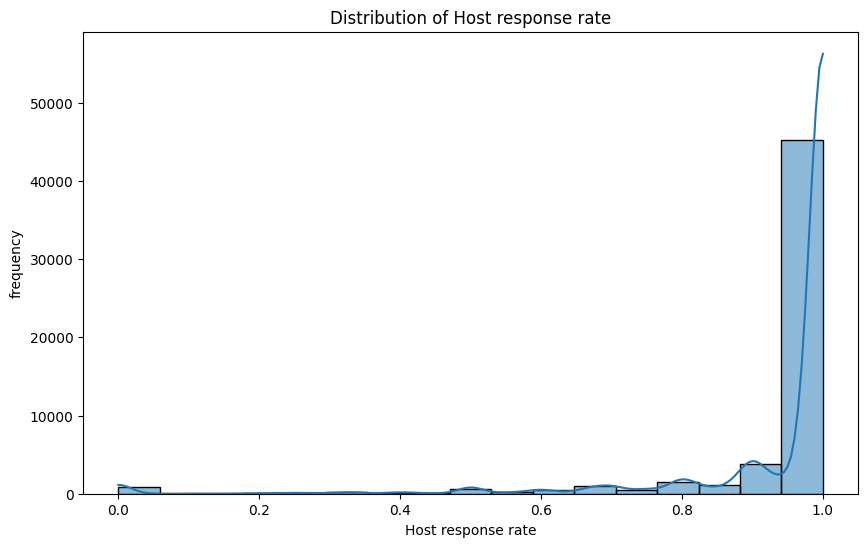

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['host_response_rate'], kde= True)
plt.title('Distribution of Host response rate')
plt.xlabel('Host response rate')
plt.ylabel('frequency')
plt.show()

Here also we can see that it is highly skewed diatribution. So here also meadian is the best measure to fill the missing values.

In [ ]:
median_host_response_rate= df['host_response_rate'].median()
df['host_response_rate'].fillna(median_host_response_rate, inplace=True)

In [ ]:
df.describe()

,id,log_price,accommodates,bathrooms,first_review,host_response_rate,host_since,last_review,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,74111.000000,58247,74111.000000,73923,58284,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.234628,2016-01-14 08:11:51.013442560,0.957465,2014-07-21 01:55:09.849437696,2017-03-14 19:27:18.789376,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
min,3.440000e+02,0.000000,1.000000,0.000000,2008-11-17 00:00:00,0.000000,2008-03-03 00:00:00,2009-01-21 00:00:00,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,2015-06-28 00:00:00,1.000000,2013-04-21 00:00:00,2017-01-09 00:00:00,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,2016-05-25 00:00:00,1.000000,2014-09-28 00:00:00,2017-04-28 00:00:00,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,2017-01-02 00:00:00,1.000000,2015-12-22 00:00:00,2017-09-08 00:00:00,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,2017-10-05 00:00:00,1.000000,2017-10-04 00:00:00,2017-10-05 00:00:00,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000
std,6.081735e+06,0.717394,2.153589,0.581386,NaN,0.143891,NaN,NaN,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142


# 3. first_review and last_review

Since bothe are datetime type column.

In [ ]:
min_date=df['first_review'].min()
min_date1= df['last_review'].min()
print(min_date,min_date1)

2008-11-17 00:00:00 2009-01-21 00:00:00


In [ ]:
max_date=df['first_review'].max()
max_date1= df['last_review'].max()
print(max_date,max_date1)

2017-10-05 00:00:00 2017-10-05 00:00:00


In [ ]:
df['host_since'].min()

Timestamp('2008-03-03 00:00:00')

We can see that min date for fist review is 2008-11-17 and maximum date for last review is 2017-10-05. And minimum date of host to join is 2008-03-03. Here what we are doing is that we are filling missing values in 'first_reviw' by minimum value of date of 'first_review' and in 'last_review' by maximum date in 'last review'. since host joining minimum date is 2008-03-03 so it will not bother our consideration.

In [ ]:
df['first_review'].fillna(min_date, inplace=True)
df['last_review'].fillna(max_date1, inplace= True)

####
Similarly 'host_since' feature missing values is filling by minumum date value of 'host_since' feature

In [ ]:
df['host_since'].fillna(df['host_since'].min(), inplace= True)

In [ ]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   6
first_review                  0
host_has_profile_pic        188
host_identity_verified      188
host_response_rate            0
host_since                    0
instant_bookable              0
last_review                   0
latitude                      0
longitude                     0
name                         10
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

# Thumbnail URL:
Unless analysis specifically involves images or thumbnails, this feature may not provide relevant information for predicting log_price. It's often better to focus on features that directly relate to the characteristics of the homestay itself. So we are going to drop this feature.

In [ ]:
df= df.drop(columns = ['thumbnail_url'], axis=1)
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,2017-10-05,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,20009,0.0,1.0


In [ ]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   6
first_review                  0
host_has_profile_pic        188
host_identity_verified      188
host_response_rate            0
host_since                    0
instant_bookable              0
last_review                   0
latitude                      0
longitude                     0
name                         10
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

Similarly for 'host_has_profile_pic' ,
'host_identity_verified' While  these features provide information about the host, they may not be directly related to the price of the homestay listing. Unless there's a strong reason to believe that these features significantly impact pricing, they could be dropped initially.

In [ ]:
df= df.drop(columns = ['host_has_profile_pic','host_identity_verified'], axis=1)


In [ ]:
df.isnull().sum()

id                          0
log_price                   0
property_type               0
room_type                   0
amenities                   0
accommodates                0
bathrooms                   0
bed_type                    0
cancellation_policy         0
cleaning_fee                0
city                        0
description                 6
first_review                0
host_response_rate          0
host_since                  0
instant_bookable            0
last_review                 0
latitude                    0
longitude                   0
name                       10
neighbourhood            6872
number_of_reviews           0
review_scores_rating    16722
zipcode                   966
bedrooms                   91
beds                      131
dtype: int64

In [ ]:
df['review_scores_rating'].describe()

count    57389.000000
mean        94.067365
std          7.836556
min         20.000000
25%         92.000000
50%         96.000000
75%        100.000000
max        100.000000
Name: review_scores_rating, dtype: float64

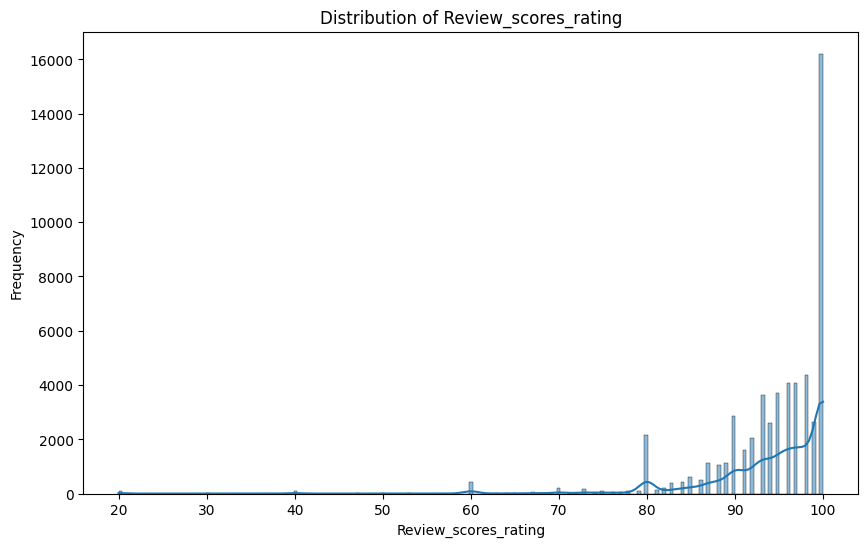

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(x=df['review_scores_rating'], kde= True)
plt.title("Distribution of Review_scores_rating")
plt.xlabel('Review_scores_rating')
plt.ylabel('Frequency')
plt.show()

# Review_score_rating

for this feature median can be considered as the measure of center tendency. So missing values will be filled by median.

In [ ]:
median_rating= df['review_scores_rating'].median()

In [ ]:
median_rating

96.0

In [ ]:
df['review_scores_rating'].fillna(median_rating, inplace= True)

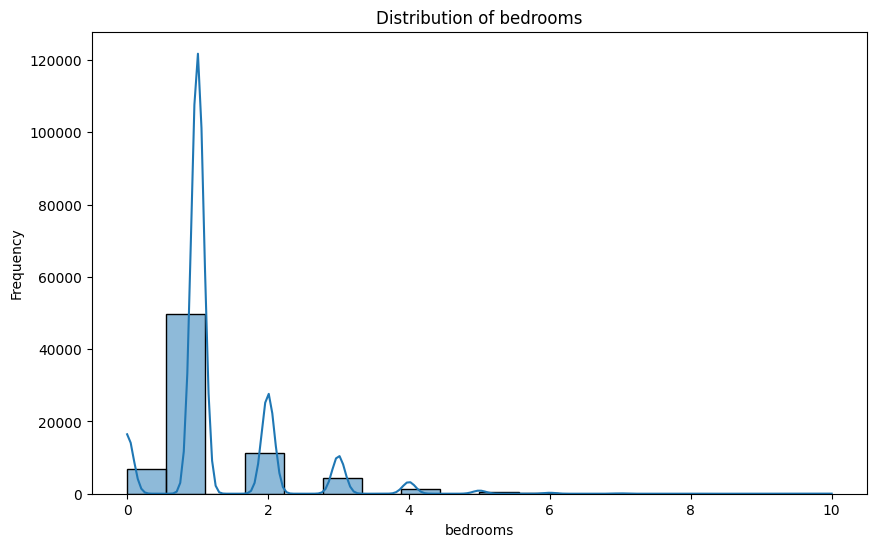

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(x=df['bedrooms'], kde= True)
plt.title("Distribution of bedrooms")
plt.xlabel('bedrooms')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    74111 non-null  int64         
 1   log_price             74111 non-null  float64       
 2   property_type         74111 non-null  object        
 3   room_type             74111 non-null  object        
 4   amenities             74111 non-null  object        
 5   accommodates          74111 non-null  int64         
 6   bathrooms             74111 non-null  float64       
 7   bed_type              74111 non-null  object        
 8   cancellation_policy   74111 non-null  object        
 9   cleaning_fee          74111 non-null  bool          
 10  city                  74111 non-null  object        
 11  description           74105 non-null  object        
 12  first_review          74111 non-null  datetime64[ns]
 13  host_response_ra

In [ ]:
df['neighbourhood'].nunique()

619

In [ ]:
df['zipcode'].nunique()

669

# Neighbourhood:
Reason to do this is:
First we find the neighbourhood for every record than fill the missing values in 'zipcode' feature according to the neighbourhood and fill missing values in 'bedrooms' column according to the 'property type' and 'neighbourhood'.

In [ ]:
from sklearn.neighbors import KDTree

In [ ]:
# Select only the listings with known neighbourhoods
df_known_neighbour = df.dropna(subset=['neighbourhood'])

# Create a KD-tree using the longitude and latitude of listings with known neighbourhood
X = df_known_neighbour[['latitude', 'longitude']].values
kdtree = KDTree(X)


# Function to fill missing neighbourhoods with the mode neighbourhood in the same geographic vicinity
def fill_missing_neighbourhood(row, df_known_neighbour):
    if pd.isnull(row['neighbourhood']):  # If the 'neighbourhood' is missing
        query_point = np.array([row['latitude'], row['longitude']]).reshape(1, -1)
        dist, idx = kdtree.query(query_point, k=5)  # Find k nearest neighbours
        nearest_neighbourhoods = df_known_neighbour.iloc[idx[0]]['neighbourhood']
        mode_neighbourhood = nearest_neighbourhoods.mode().values
        if len(mode_neighbourhood) > 0:
            return mode_neighbourhood[0]
        else:
            return np.nan
    else:
        return row['neighbourhood']

# Apply the function to fill missing values in the 'neighbourhood' feature
df['neighbourhood'] = df.apply(fill_missing_neighbourhood, args=(df_known_neighbour,), axis=1)

In [ ]:
df['neighbourhood'].isnull().sum()

0

# zipcode:


In [ ]:


def fill_missing_zipcode(row, df):
    if pd.isnull(row['zipcode']):  # If the 'zipcode' is missing
        neighbourhood = row['neighbourhood']
        mode_zipcode = df[df['neighbourhood'] == neighbourhood]['zipcode'].mode().values
        if len(mode_zipcode) > 0:
            return mode_zipcode[0]
        else:
            return np.nan
    else:
        return row['zipcode']

# Apply the function to fill missing values in the 'zipcode' feature
df['zipcode'] = df.apply(fill_missing_zipcode, args=(df,), axis=1)

In [ ]:
df['zipcode'].isnull().sum()

1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    74111 non-null  int64         
 1   log_price             74111 non-null  float64       
 2   property_type         74111 non-null  object        
 3   room_type             74111 non-null  object        
 4   amenities             74111 non-null  object        
 5   accommodates          74111 non-null  int64         
 6   bathrooms             74111 non-null  float64       
 7   bed_type              74111 non-null  object        
 8   cancellation_policy   74111 non-null  object        
 9   cleaning_fee          74111 non-null  bool          
 10  city                  74111 non-null  object        
 11  description           74105 non-null  object        
 12  first_review          74111 non-null  datetime64[ns]
 13  host_response_ra

In [ ]:
df.isnull().sum()

id                        0
log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               6
first_review              0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
latitude                  0
longitude                 0
name                     10
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
zipcode                   1
bedrooms                 91
beds                    131
dtype: int64

For treating the missing values of 'bedrooms':
First we make groups according to the property type then and then will the missing values by median of the group because 'bedroom' is the neumerical feature and the best way of measure of center tendency for neumerical variable is mean and meadian according to the situation. Here we choose median.

In [ ]:
df['bedrooms'] = df.groupby(['property_type','neighbourhood'])['bedrooms'].transform(lambda x: x.fillna(x.median()))


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [ ]:
df.isnull().sum()

id                        0
log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               6
first_review              0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
latitude                  0
longitude                 0
name                     10
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
zipcode                   1
bedrooms                  1
beds                    131
dtype: int64

Similarly for 'beds'

In [ ]:
df['beds'] = df.groupby(['property_type', 'neighbourhood','bedrooms'])['beds'].transform(lambda x: x.fillna(x.median()))

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [ ]:
df.isnull().sum()

id                       0
log_price                0
property_type            0
room_type                0
amenities                0
accommodates             0
bathrooms                0
bed_type                 0
cancellation_policy      0
cleaning_fee             0
city                     0
description              6
first_review             0
host_response_rate       0
host_since               0
instant_bookable         0
last_review              0
latitude                 0
longitude                0
name                    10
neighbourhood            0
number_of_reviews        0
review_scores_rating     0
zipcode                  1
bedrooms                 1
beds                     3
dtype: int64

#
1. Description has only 6 records missing. and it is not appropriate to fill the desription because description of two properties can be significantly different. So drop the records.
2. Name has only 10 records missing. And names of two properties are generally different. So its best to drop these missing records.
3. 'beds' has 3 and 'bedrooms' has only 1 and 'zipcode' has only 1 recods of missing and these records are not filling somehow. So i am going to drop these two records also.

In [ ]:
df.dropna(subset=['description', 'name', 'bedrooms', 'beds', 'zipcode'], inplace=True)

In [ ]:
df.isnull().sum()

id                      0
log_price               0
property_type           0
room_type               0
amenities               0
accommodates            0
bathrooms               0
bed_type                0
cancellation_policy     0
cleaning_fee            0
city                    0
description             0
first_review            0
host_response_rate      0
host_since              0
instant_bookable        0
last_review             0
latitude                0
longitude               0
name                    0
neighbourhood           0
number_of_reviews       0
review_scores_rating    0
zipcode                 0
bedrooms                0
beds                    0
dtype: int64

Missing values imputation is done. we can see there is no missing values. Only few records is lost. Maximum data is retained so we do not lost almost any information.

### Now the data dosn't have the missing values.
Now we can do feature enginnering on the data.

# Adding feature Host tenure
Host tenure= (current date - host since).dt.days/365.25

365.25 is taken to consider leap year also.

In [ ]:
df['Host_Tenure']= (datetime.datetime.now()-df.host_since ).dt.days/365.25

In [ ]:
df['Host_Tenure']

0        12.114990
1         6.882957
2         7.531828
3         9.051335
4         9.185489
           ...    
74106    11.121150
74107     8.010951
74108    12.336756
74109     6.636550
74110    11.444216
Name: Host_Tenure, Length: 74091, dtype: float64

In [ ]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,Host_Tenure
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201,1.0,1.0,12.114990
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,10019,3.0,3.0,6.882957
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,10027,1.0,3.0,7.531828
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,96.0,94117,2.0,2.0,9.051335
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,20009,0.0,1.0,9.185489


# Animities_count

In [ ]:
def count_amenities(amenities):
    return len(amenities.split(','))

# Apply the function to create the 'Amenities_Count' feature
df['Amenities_Count'] = df['amenities'].apply(count_amenities)


In [ ]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,Host_Tenure,Amenities_Count
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201,1.0,1.0,12.114990,9
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,10019,3.0,3.0,6.882957,15
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,-73.943756,The Garden Oasis,Harlem,10,92.0,10027,1.0,3.0,7.531828,19
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,96.0,94117,2.0,2.0,9.051335,15
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,20009,0.0,1.0,9.185489,12


# Days_Since_Last_Review

Days_Since_last_Review = (current date-last_review).dt.days

In [ ]:
df['Days_Since_last_Review'] = (datetime.datetime.now() - df.last_review).dt.days

In [ ]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_response_rate', 'host_since', 'instant_bookable', 'last_review',
       'latitude', 'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'zipcode', 'bedrooms', 'beds', 'Host_Tenure',
       'Amenities_Count', 'Days_Since_last_Review'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74091 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      74091 non-null  int64         
 1   log_price               74091 non-null  float64       
 2   property_type           74091 non-null  object        
 3   room_type               74091 non-null  object        
 4   amenities               74091 non-null  object        
 5   accommodates            74091 non-null  int64         
 6   bathrooms               74091 non-null  float64       
 7   bed_type                74091 non-null  object        
 8   cancellation_policy     74091 non-null  object        
 9   cleaning_fee            74091 non-null  bool          
 10  city                    74091 non-null  object        
 11  description             74091 non-null  object        
 12  first_review            74091 non-null  datetime64[

# EDA- Exploratory Data Analysis

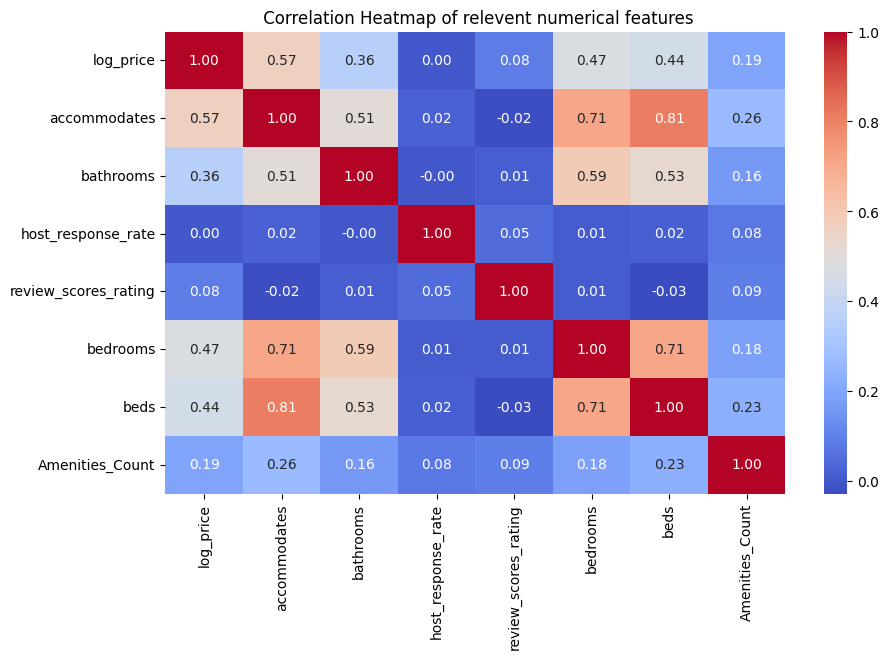

In [ ]:
# heatmap analysis to find the correation of the relevent features.
# here we will select only relevent features which influence the log_price
numerical_features= [ 'log_price','accommodates', 'bathrooms',
       'host_response_rate', 'review_scores_rating', 'bedrooms', 'beds',
       'Amenities_Count']

# Filter DataFrame to include only relevant features
df_selected= df[numerical_features]

# Calculate correlation matrix
corr_matrix = df_selected.corr()

# Plot heat map
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(" Correlation Heatmap of relevent numerical features")
plt.show()




Here we can see from the heatmap that accomodates has the maximum infuence on log_price. After that bedrooms, beds, bathrooms and animities_count.
Animities_count is not very strongly correlated with log_price.

In [ ]:
df['property_type'].value_counts()


property_type
Apartment             48991
House                 16509
Condominium            2654
Townhouse              1692
Loft                   1244
Other                   606
Guesthouse              497
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
Chalet                    6
Earth House               4
Tipi                      3
Train                     2
Cave                      2
Casa particular           1
Parking Space             1
Lighthouse                1
Island                    1
Name: 

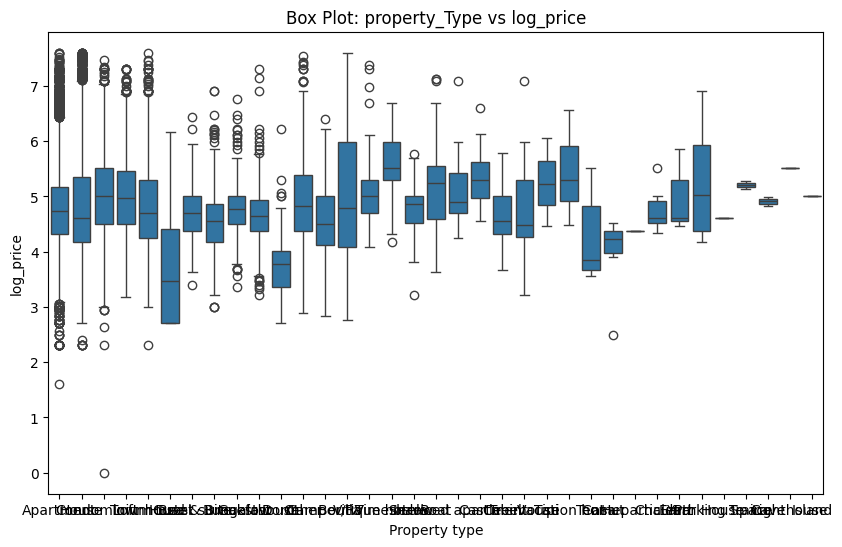

In [ ]:
# For relevent categorical features
# Property_Type vs log_price

plt.figure(figsize=(10,6))
sns.boxplot(x='property_type', y= 'log_price', data= df)
plt.title("Box Plot: property_Type vs log_price")
plt.xlabel("Property type")
plt.ylabel("log_price")
plt.show()

So we can clearly see that if we take all the categories of property type plot is not very much readable. So what we can do is we will select relevent categories from the total categories of property type. As we can see above {Apartment             48992,
House                 16510,
Condominium            2654,
Townhouse              1692,
Loft                   1244}
having maximum no of records. so we will take those categories and plot the boxplot and see the relationship between property_type and log_price.

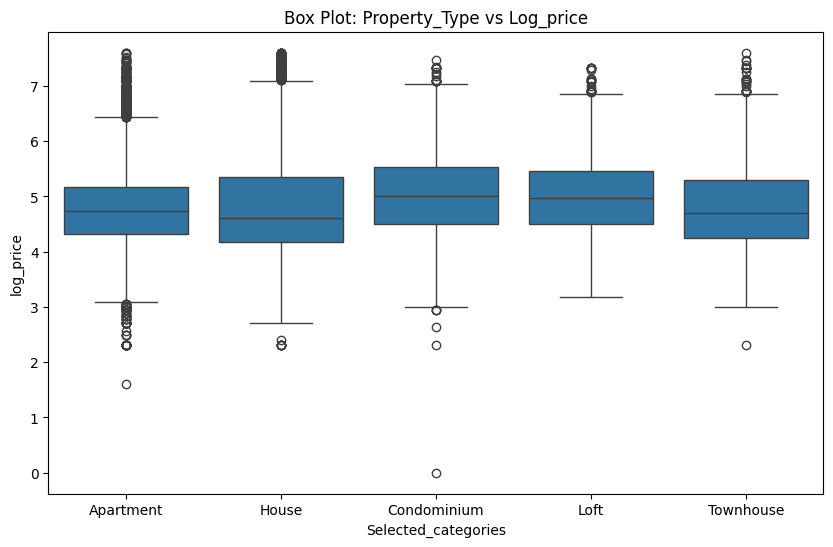

In [ ]:
# Specify the categories of property_type you want to include in the plot
selected_categories = ['Apartment','House','Condominium','Townhouse','Loft']

# Filter the DataFrame to include only rows with property_type in the selected categories
df_selected = df[df['property_type'].isin(selected_categories)]

# create boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='property_type', y='log_price', data= df_selected)
plt.title("Box Plot: Property_Type vs Log_price")
plt.xlabel("Selected_categories")
plt.ylabel("log_price")
plt.show()

* here we can compare the log price with respect to categories.

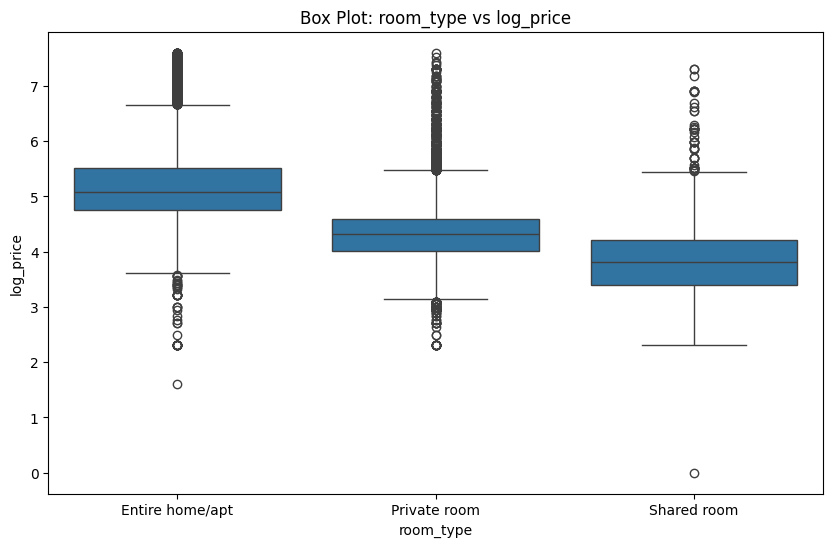

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='room_type', y= 'log_price', data= df)
plt.title("Box Plot: room_type vs log_price")
plt.xlabel("room_type")
plt.ylabel("log_price")
plt.show()

* Similarly here log_price: entire home/apt> Private room> shared Room

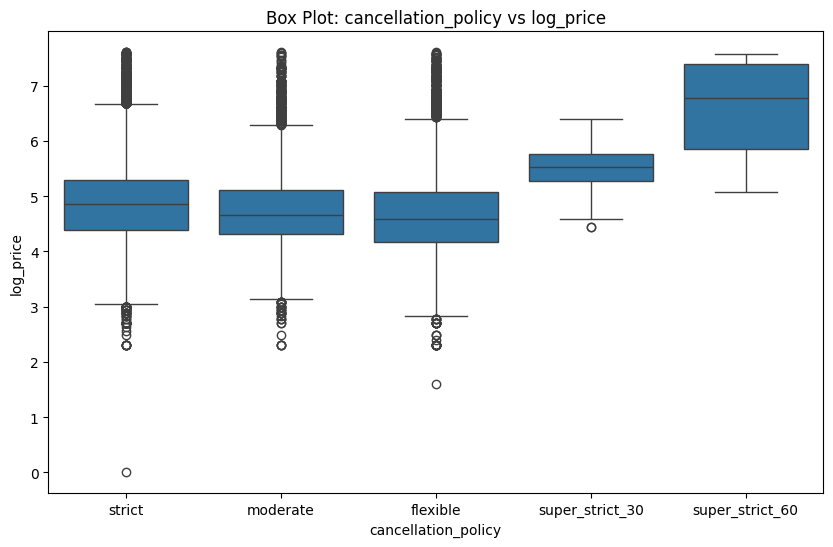

In [ ]:
# Boxplot : cancellation_policy vs log_price
plt.figure(figsize=(10,6))
sns.boxplot(x='cancellation_policy', y= 'log_price', data= df)
plt.title("Box Plot: cancellation_policy vs log_price")
plt.xlabel("cancellation_policy")
plt.ylabel("log_price")
plt.show()

* Here we can clearly see that 'super_strict_60' cancellation policy has highest log price.

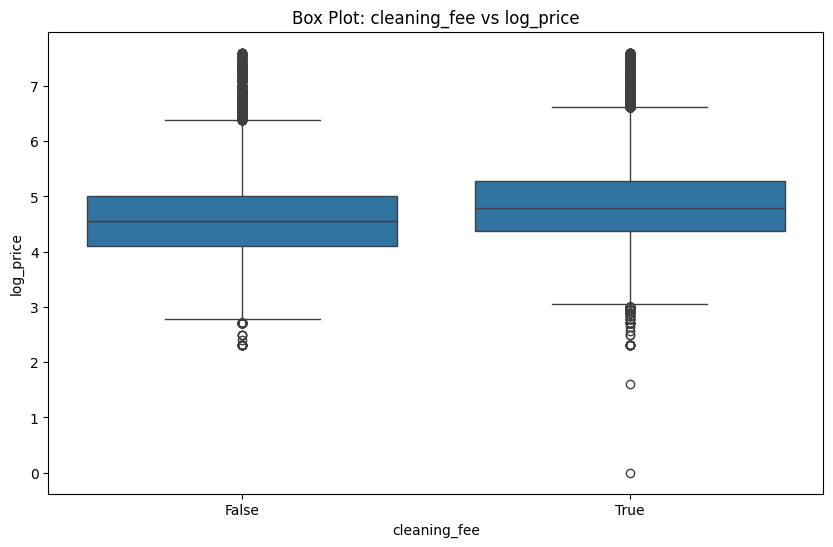

In [ ]:
# Boxplot : cleaning_fee vs log_price
plt.figure(figsize=(10,6))
sns.boxplot(x='cleaning_fee', y= 'log_price', data= df)
plt.title("Box Plot: cleaning_fee vs log_price")
plt.xlabel("cleaning_fee")
plt.ylabel("log_price")
plt.show()

* property which have cleaning fee have more log price.

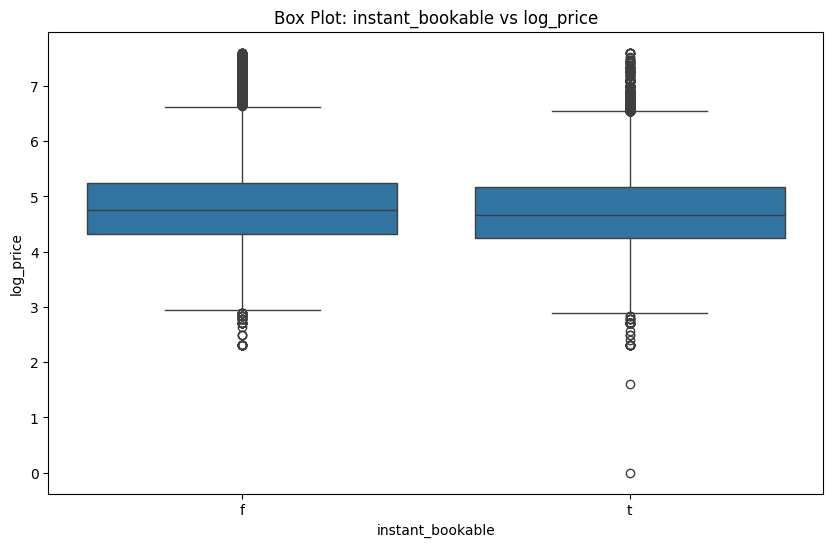

In [ ]:
# Boxplot: instant_bookable vs log_price
plt.figure(figsize=(10,6))
sns.boxplot(x='instant_bookable', y= 'log_price', data= df)
plt.title("Box Plot: instant_bookable vs log_price")
plt.xlabel("instant_bookable")
plt.ylabel("log_price")
plt.show()

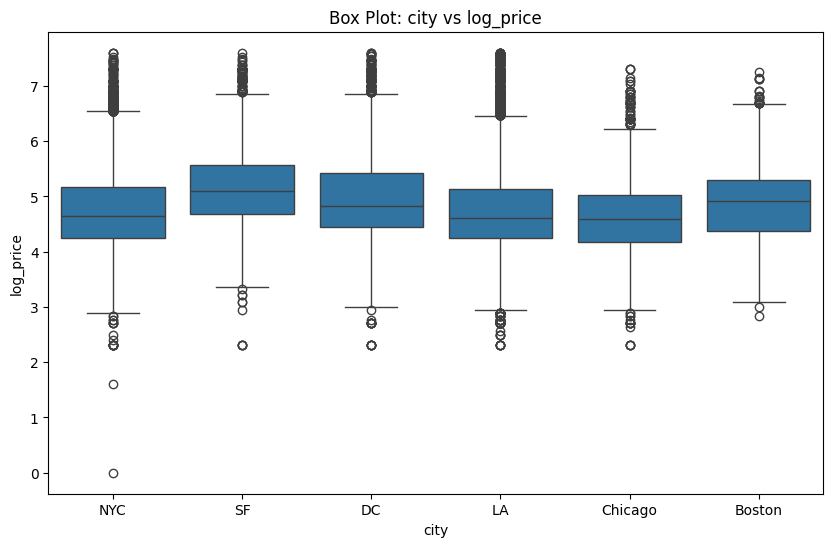

In [ ]:
# Boxplot: city vs log_price
plt.figure(figsize=(10,6))
sns.boxplot(x='city', y= 'log_price', data= df)
plt.title("Box Plot: city vs log_price")
plt.xlabel("city")
plt.ylabel("log_price")
plt.show()

SF, Boston and NYC has more (in descending order) log_price then that of other cities.

# Now for relevent numerical features
1. We already seen from the heatmap that accomodates has the maximum infuence on log_price. After that bedrooms, beds, bathrooms and animities_count
2. numerical_features= [ 'log_price','accommodates', 'bathrooms','bedrooms', 'beds', 'Amenities_Count']

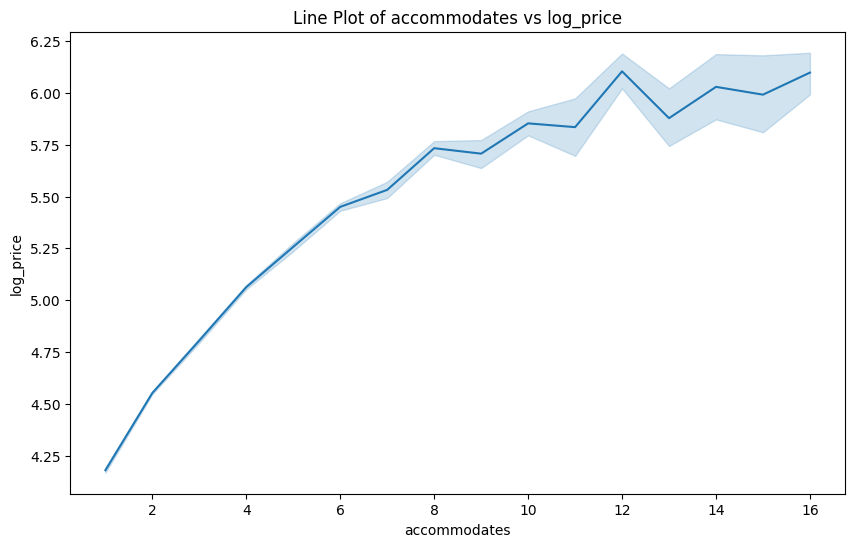

In [ ]:
# Line plot: accommodates vs log_price

plt.figure(figsize=(10,6))
sns.lineplot(x='accommodates', y= 'log_price', data= df)
plt.title("Line Plot of accommodates vs log_price")
plt.xlabel('accommodates')
plt.ylabel('log_price')
plt.show()

In [ ]:
df['accommodates'].value_counts()

accommodates
2     31848
4     12063
1      9429
3      7791
6      4969
5      3443
8      1794
7       946
10      700
16      301
9       270
12      264
14      104
11       79
15       54
13       36
Name: count, dtype: int64

as we can see from the line plot and value_counts of 'accommodates' feature, log_price increase when value of accommodates increase. But here we have to keep this in mind that accommodates(1,2,3,4,5,6,7,8) has maximum share.

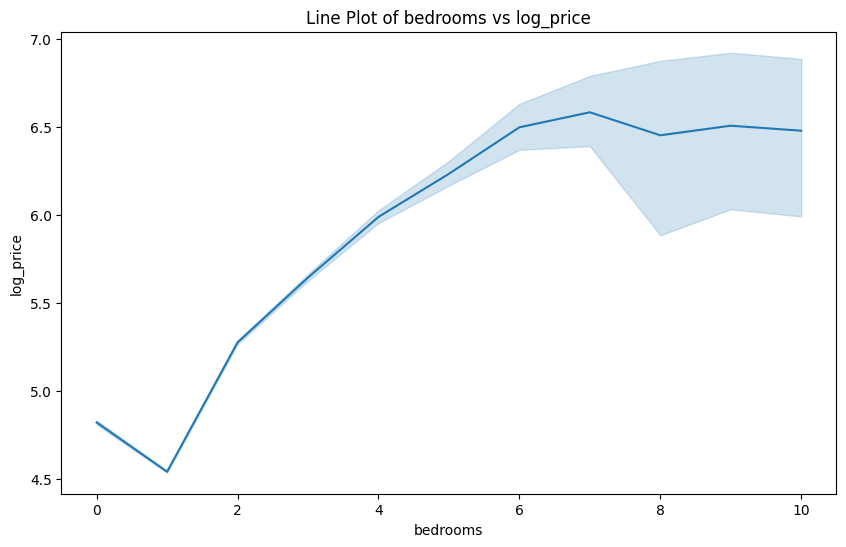

In [ ]:
# lineplot : bedrooms vs log_price
plt.figure(figsize=(10,6))
sns.lineplot(x='bedrooms', y= 'log_price', data= df)
plt.title("Line Plot of bedrooms vs log_price")
plt.xlabel('bedrooms')
plt.ylabel('log_price')
plt.show()

In [ ]:
df['bedrooms'].value_counts()

bedrooms
1.0     49854
2.0     11353
0.0      6715
3.0      4308
4.0      1330
5.0       355
6.0       106
7.0        38
8.0        14
10.0       10
9.0         8
Name: count, dtype: int64

we can see from the value counts of 'bedrooms' and lineplot, it can be seen that 7 bedrooms property has maximum log price. But 1 bedroom property has maximum value counts and minimum log_price.

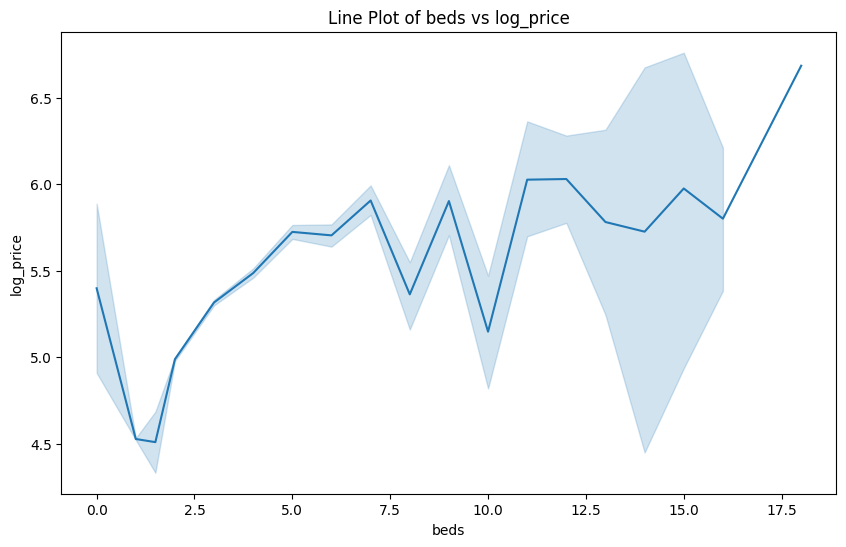

In [ ]:
# lineplot: beds vs log_price

plt.figure(figsize=(10,6))
sns.lineplot(x='beds', y= 'log_price', data= df)
plt.title("Line Plot of beds vs log_price")
plt.xlabel('beds')
plt.ylabel('log_price')
plt.show()

In [ ]:
df['beds'].value_counts()

beds
1.0     45248
2.0     16706
3.0      6443
4.0      3066
5.0      1287
6.0       660
7.0       216
8.0       186
10.0       88
9.0        72
16.0       38
12.0       29
11.0       23
13.0       10
15.0        6
14.0        4
1.5         4
0.0         4
18.0        1
Name: count, dtype: int64

it can be seen here by observing value counts and line plot that beds=1 have maximum counts and has minimum log_price.
As the no of beds increase log_price increases eventually.

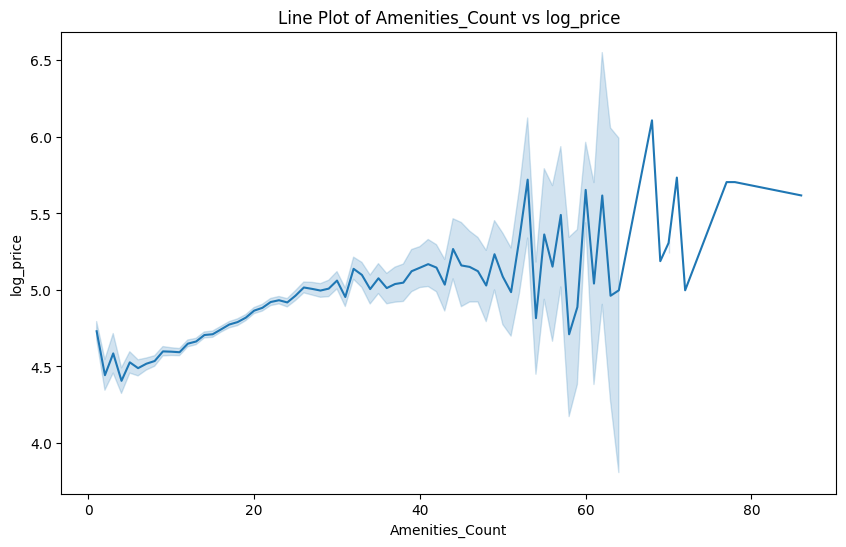

In [ ]:
# lineplot: Aminities_count vs log_price

plt.figure(figsize=(10,6))
sns.lineplot(x='Amenities_Count', y= 'log_price', data= df)
plt.title("Line Plot of Amenities_Count vs log_price")
plt.xlabel('Amenities_Count')
plt.ylabel('log_price')
plt.show()

it can be seen here in the lineplot that as aminities_count increase log_price generally increase, around 65-70 aminities count it reached maximum. further increase in aminities leds to somewhat decreases log_price.

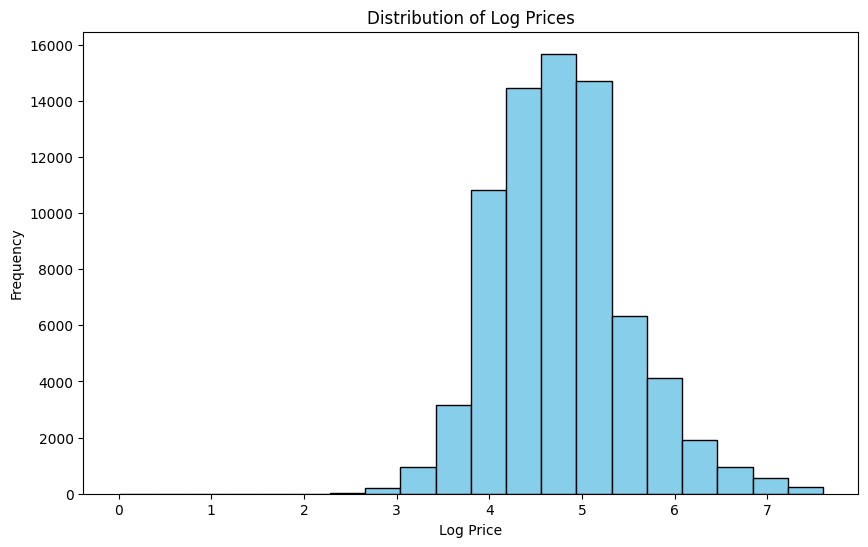

neighbourhood
16th Street Heights    4.681032
Adams Morgan           4.928131
Alamo Square           5.146056
Albany Park            4.203446
Alhambra               4.172808
                         ...   
Woodlawn               4.295432
Woodley Park           5.192526
Woodridge              4.512692
Woodside               4.303016
Wrigleyville           5.064504
Name: log_price, Length: 618, dtype: float64


In [ ]:
average_prices = df.groupby('neighbourhood')['log_price'].mean()

# Visualize pricing distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['log_price'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.title('Distribution of Log Prices')
plt.show()

# Analyze pricing trends
# Compare average prices across different neighborhoods
print(average_prices)

In [ ]:
import folium
from folium.plugins import HeatMap

# 1. Load the Data (Assuming df contains latitude, longitude, and pricing information)
# df = pd.read_csv('homestay_listings.csv')

# 2. Explore the Data
# Example: Print summary statistics of pricing
print(df['log_price'].describe())

# 3. Plot on Map
# Create a Folium Map centered at the mean latitude and longitude
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=10)

# Add markers for each listing with pricing information
for idx, row in df.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=5,
                        color='blue',
                        fill=True,
                        fill_color='blue',
                        fill_opacity=0.7,
                        popup=f"Price: ${row['log_price']}"
                        ).add_to(m)

# 4. Color Code Markers
# You can customize the marker colors based on pricing information

# 5. Analyze Spatial Patterns
# You can visually inspect the map for spatial patterns or use statistical tools for further analysis

# Display the map



count    74091.000000
mean         4.782147
std          0.717373
min          0.000000
25%          4.317488
50%          4.709530
75%          5.220356
max          7.600402
Name: log_price, dtype: float64


In [ ]:
m.save('map.html')

In [ ]:
pip install pysal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 776.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 716.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 608.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 443.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 464.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 491.2 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.8/331.8 kB 546.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━

In [ ]:
from pysal.explore import esda
from pysal.viz import mapclassify
import geopandas as gpd

/usr/local/lib/python3.10/dist-packages/spaghetti/network.py:42: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)


In [ ]:

from shapely.geometry import Point

# Assuming df is your DataFrame containing latitude and longitude columns
# and you want to convert it to a GeoDataFrame

# Create a GeoDataFrame from DataFrame df
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Print the GeoDataFrame to verify
print(gdf.head())

         id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...     neighbourhood  \
0  Real Bed              strict          True  ...  Brooklyn Heights   
1  Real Bed              s

In [ ]:
from pysal.lib import weights
# Calculate spatial weights matrix using K-nearest neighbors (KNN)
w = weights.KNN.from_dataframe(gdf, k=5)

# Calculate Moran's I statistic to measure spatial autocorrelation
mi = esda.Moran(gdf['log_price'], w)
print("Moran's I:", mi.I)

/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 51 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


Moran's I: 0.31653841136520044


In [ ]:
# Hotspot Analysis
# Perform Getis-Ord Gi* hotspot analysis
hotspot = esda.getisord.G_Local(df['log_price'], w, star=True)

# Classify the z-scores into significant hotspots, high, low,coldspots, and not significant
hotspot_classification = mapclassify.Quantiles(hotspot.z_sim, k=5).yb

# Add hotspot classification to the DataFrame
df['hotspot_classification'] = hotspot_classification



/usr/local/lib/python3.10/dist-packages/esda/getisord.py:615: UserWarning: Gi* requested, but (a) weights are already row-standardized, (b) no weights are on the diagonal, and (c) no default value supplied to star. Assuming that the self-weight is equivalent to the maximum weight in the row. To use a different default (like, .5), set `star=.5`, or use libpysal.weights.fill_diagonal() to set the diagonal values of your weights matrix and use `star=None` in Gi_Local.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/libpysal/weights/util.py:826: UserWarning: The weights matrix is not fully connected: 
 There are 51 disconnected components.
  w = W(neighbors, weights, ids, **kwargs)


In [ ]:
# Visualize Hotspots on Map (continued from previous code)
# Define colors for hotspots, coldspots, and not significant areas
hotspot_colors = {
    1: 'red',     # High-High (Hotspots)
    2: 'orange',  # High
    3: 'yellow',  # Low
    4: 'blue',    # Low-Low (Coldspots)
    5: 'grey'     # Not significant
}

# Create a Folium Map centered at the mean latitude and longitude
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=10)

# Add markers for each listing with pricing information
for idx, row in df.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=5,
                        color = hotspot_colors.get(row['hotspot_classification'], 'default_color'),
                        fill=True,
                        fill_color=hotspot_colors.get(row['hotspot_classification'], 'default_color'),
                        fill_opacity=0.7,
                        popup=f"Price: ${row['log_price']}"
                        ).add_to(m)

# Display the map
m.save('hotspot_map.html')  # Save the map as an HTML file

In [ ]:

df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,Host_Tenure,Amenities_Count,Days_Since_last_Review,hotspot_classification
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,Brooklyn Heights,2,100.0,11201,1.0,1.0,12.114990,9,2850,2
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,Hell's Kitchen,6,93.0,10019,3.0,3.0,6.882957,15,2418,3
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,Harlem,10,92.0,10027,1.0,3.0,7.531828,19,2427,3
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,Lower Haight,0,96.0,94117,2.0,2.0,9.051335,15,2406,3
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,Columbia Heights,4,40.0,20009,0.0,1.0,9.185489,12,2662,2


In [ ]:
df.to_csv('Cleaned_df.csv')

In [ ]:
df.to_excel('Cleaned_df.xlsx')